In [28]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("UpdatedResumeDataSet.csv")

In [30]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [31]:
df.shape

(1262, 2)

In [32]:
counts = df['Category'].value_counts()
labels = df['Category'].unique

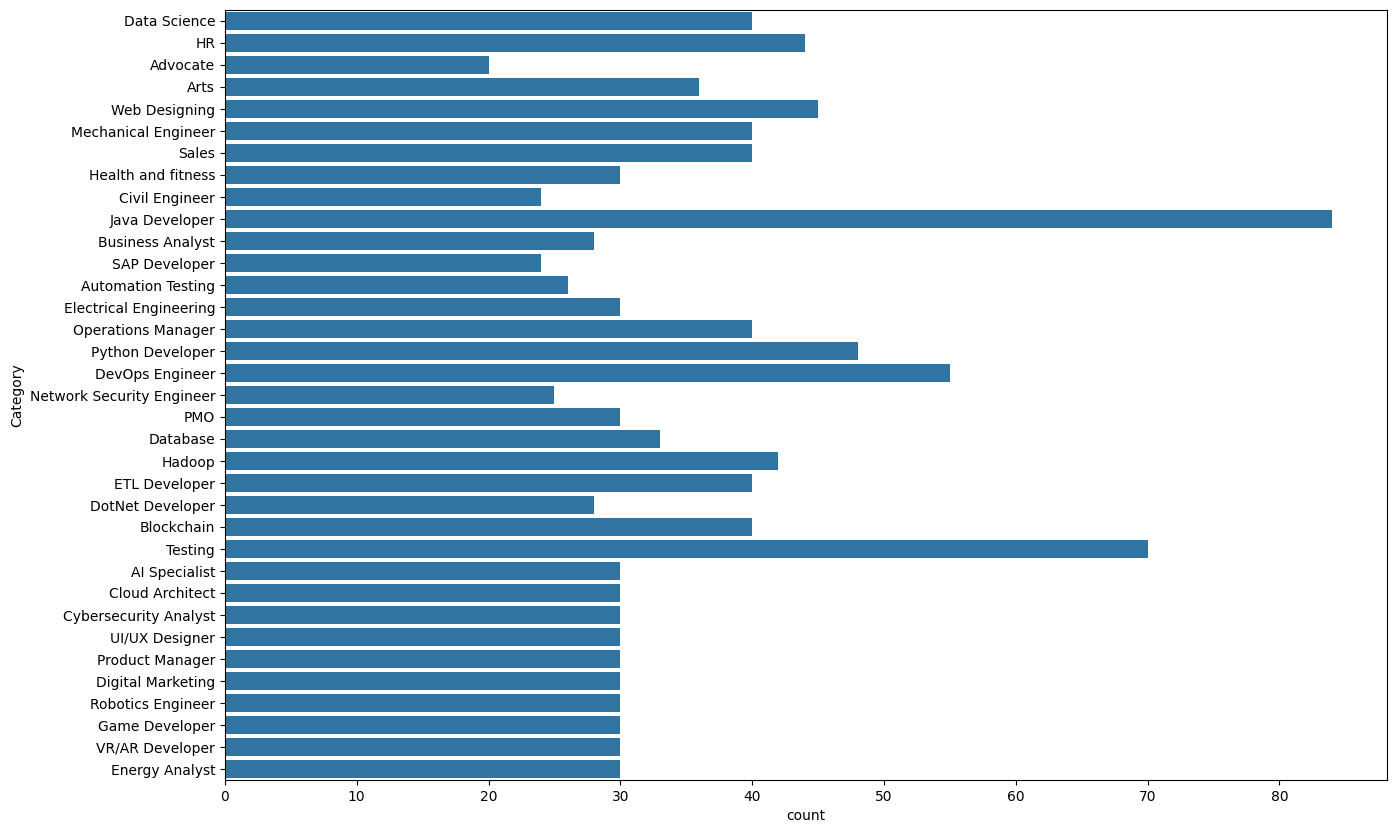

In [33]:
plt.figure(figsize=(15,10))
sns.countplot(df['Category'])
plt.show()

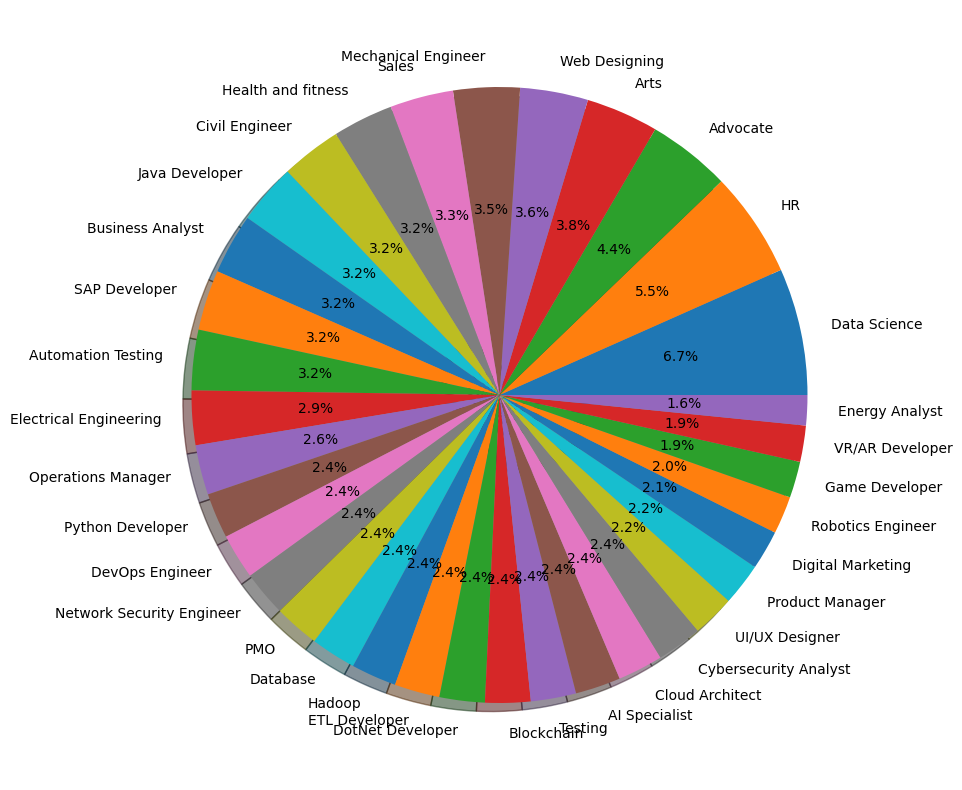

In [34]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize = (15,10))
plt.pie(counts, labels=labels,autopct = '%1.1F%%',shadow = True)
plt.show()

In [35]:
df['Category'][0]


'Data Science'

In [36]:
df['Resume'][2]

'Areas of Interest Deep Learning, Control System Design, Programming in-Python, Electric Machinery, Web Development, Analytics Technical Activities q Hindustan Aeronautics Limited, Bangalore - For 4 weeks under the guidance of Mr. Satish, Senior Engineer in the hangar of Mirage 2000 fighter aircraft Technical Skills Programming Matlab, Python and Java, LabView, Python WebFrameWork-Django, Flask, LTSPICE-intermediate Languages and and MIPOWER-intermediate, Github (GitBash), Jupyter Notebook, Xampp, MySQL-Basics, Python Software Packages Interpreters-Anaconda, Python2, Python3, Pycharm, Java IDE-Eclipse Operating Systems Windows, Ubuntu, Debian-Kali Linux Education Details \r\nJanuary 2019 B.Tech. Electrical and Electronics Engineering  Manipal Institute of Technology\r\nJanuary 2015    DEEKSHA CENTER\r\nJanuary 2013    Little Flower Public School\r\nAugust 2000    Manipal Academy of Higher\r\nDATA SCIENCE \r\n\r\nDATA SCIENCE AND ELECTRICAL ENTHUSIAST\r\nSkill Details \r\nData Analysis-

In [37]:
import re
def CleanResume(txt):
    cleanTxt = re.sub('https\S+\s',' ' ,txt)
    cleanTxt = re.sub('RT|cc',' ',cleanTxt)
    cleanTxt = re.sub('@\S+',' ',cleanTxt)
    cleanTxt = re.sub('#\S+','',cleanTxt)
    cleanTxt = re.sub('[%s]'%re.escape("""!"#$%&'()*+-/,.:;<=??@[\]^_~{|}"""),' ',cleanTxt)
    cleanTxt = re.sub('\s+',' ',cleanTxt)
    cleanTxt = re.sub(r'[^\x100-\x7f]',' ',cleanTxt)
    
    return cleanTxt

In [38]:
CleanResume("my portfolio r4r0\sd\sd hdsgj 2 #https://ashish and it is buil with react my mail @ac ashish@gmail hell")

'my portfolio r4r0 sd sd hdsgj 2 and it is buil with react my mail ashish hell'

In [39]:
df['Resume'] = df['Resume'].apply(lambda x : CleanResume(x))

In [40]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na  ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the

In [41]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing',
       'AI Specialist', 'Cloud Architect', 'Cybersecurity Analyst',
       'UI/UX Designer', 'Product Manager', 'Digital Marketing',
       'Robotics Engineer', 'Game Developer', 'VR/AR Developer',
       'Energy Analyst'], dtype=object)

In [42]:
#  WORDS IN CATEGORICAL FORM
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [43]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [44]:
df['Category'].unique()

array([ 9, 18,  1,  2, 34, 22, 30, 20,  6, 21,  5, 29,  3, 15, 24, 27, 11,
       23, 25, 10, 19, 14, 13,  4, 31,  0,  7,  8, 32, 26, 12, 28, 17, 33,
       16])

In [45]:
# VECTORIZATIION
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
tfidf.fit(df['Resume'])
requiredText = tfidf.transform(df['Resume'])

In [46]:
 # SPLITTING
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_test, y_train, y_test = train_test_split(requiredText, df['Category'], test_size=0.33, random_state=42)

In [48]:
x_train.shape

(845, 7359)

In [49]:
x_test.shape

(417, 7359)

In [50]:
 # MODEL TRAINING
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(x_train,y_train)
yprid = clf.predict(x_test)
print(accuracy_score(y_test,yprid))

0.9832134292565947


In [51]:
# PREDICTION SYSTEM

In [52]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))

In [53]:
resume = """Ashish Padiyar ashishpadiyar92@gmail.com | +91-9410186375 | Dehradun,India
Linkedin | GitHub | LeetCode | CodeForces | HackerRank
Professional Summary
Motivated and detail-oriented Computer Science undergraduate with a strong foundation in
programming, data structures, and algorithms. Experienced in developing database-driven
applications and backend systems using SQL, Python, and Java.
Education
FYLFOT PUBLIC SCHOOL
Intermediate
Percentage: 94%2021 - 2022
Dehradun,India
FYLFOT PUBLIC SCHOOL
Matriculation
Percentage: 90%2019 - 2020
Dehradun,India
Technical Skills
Programming Languages : C, C++, Java, Python
Database Technologies : SQL, Database Design, Data Modeling
Tools / Platforms
Data and Algorithms
:
:
Git, Version Control, Linux/Unix Command Line
Data Structures, Basic Machine Learning
Relevant Projects
- Electricity Billing System (Java, SQL)
- Developed database for managing billing records.
- Implemented CRUD operations for efficient data handling.
- Hotel Management System (Python, SQL)
- Created a booking management system with SQL database for storage and retrieval.
- Employee Management System (C++)
- Built an employee management tool with optimized data storage.
- Tic-Tac-Toe Game (C++)
- Created a game to improve logic and coding skills.
Certifications & Achievements
- NPTEL Elite Plus Certification in Java - 2023
- Tech Wizard Event Participant - 2022
- Ministry of Education Appreciation - Outstanding board exam performance
Extracurriculars & Interests
- Participated in programming and data science events
- Enthusiastic about database management, data analysis, and backend development"""

In [54]:
import pickle

# load the trained classifier
clf = pickle.load(open('clf.pkl','rb'))

# clean the input

cleanedResume = CleanResume(resume)

# Transform input into sparse matrix using trained TfidfVectorizer
inputFeatures = tfidf.transform([cleanedResume])

# make prediction using load classifier
#predictionId = clf.predict(inputFeatures)[0]
# Get prediction probabilities for all categories
predictionProbs = clf.predict_proba(inputFeatures)[0]
# Map category
categoryMapping = {
     9: 'Data Science',
    18: 'HR',
    1: 'Advocate',
    2: 'Arts',
    34: 'Web Designing',
    22: 'Mechanical Engineer',
    30: 'Sales',
    20: 'Health and fitness',
    6: 'Civil Engineer',
    21: 'Java Developer',
    5: 'Business Analyst',
    29: 'SAP Developer',
    3: 'Automation Testing',
    15: 'Electrical Engineering',
    24: 'Operations Manager',
    27: 'Python Developer',
    11: 'DevOps Engineer',
    23: 'Network Security Engineer',
    25: 'PMO',
    10: 'Database',
    19: 'Hadoop',
    14: 'ETL Developer',
    13: 'DotNet Developer',
    4: 'Blockchain',
    31: 'Testing',
    0: 'AI Specialist',
    7: 'Cloud Architect',
    8: 'Cybersecurity Analyst',
    32: 'UI/UX Designer',
    26: 'Product Manager',
    12: 'Digital Marketing',
    28: 'Robotics Engineer',
    17: 'Game Developer',
    33: 'VR/AR Developer',
    16: 'Energy Analyst'
        
}

#categoryName = categoryMapping.get(predictionId,"Unknown")

#print(predictionId,categoryName)

# setting threshhold
threshold = 0.1

# Find all relevant categories based on the threshold
relevantCategories = [
    categoryMapping[i] 
    for i, prob in enumerate(predictionProbs) 
    if prob > threshold
]
print("\nRelevant categories based on the prediction probabilities:")
for category in relevantCategories:
    print(category)


Relevant categories based on the prediction probabilities:
Data Science
Java Developer
